In [166]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import colors
import datetime
import plotly.express as px 
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np

In [23]:
df = pd.read_csv('/Users/ceciliachen/Desktop/NYU/1007/project/Salary_Data_Based_country_and_race - Salary_Data_Based_country_and_race.csv')
df.head()

,Unnamed: 0,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,0,32,Male,Bachelor's,Software Engineer,5.0,"$90,000.00",UK,White
1,1,28,Female,Master's,Data Analyst,3.0,"$65,000.00",USA,Hispanic
2,2,45,Male,PhD,Senior Manager,15.0,"$150,000.00",Canada,White
3,3,36,Female,Bachelor's,Sales Associate,7.0,"$60,000.00",USA,Hispanic
4,4,52,Male,Master's,Director,20.0,"$200,000.00",USA,Asian


In [24]:
df.isna().sum()

Unnamed: 0             0
Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 2
Country                0
Race                   0
dtype: int64

In [25]:
df1 = df.dropna()
df1.drop("Unnamed: 0", axis=1, inplace=True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6698 entries, 0 to 6699
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6698 non-null   int64  
 1   Gender               6698 non-null   object 
 2   Education Level      6698 non-null   object 
 3   Job Title            6698 non-null   object 
 4   Years of Experience  6698 non-null   float64
 5   Salary               6698 non-null   object 
 6   Country              6698 non-null   object 
 7   Race                 6698 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 471.0+ KB


/Users/ceciliachen/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [26]:
df1['Salary'] = df1['Salary'].replace('[\$,]', '', regex=True).astype(float)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6698 entries, 0 to 6699
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6698 non-null   int64  
 1   Gender               6698 non-null   object 
 2   Education Level      6698 non-null   object 
 3   Job Title            6698 non-null   object 
 4   Years of Experience  6698 non-null   float64
 5   Salary               6698 non-null   float64
 6   Country              6698 non-null   object 
 7   Race                 6698 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 471.0+ KB


/var/folders/kr/69yx7dk54w32fmx1yq1fv5r00000gn/T/ipykernel_32453/3858253058.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Salary'] = df1['Salary'].replace('[\$,]', '', regex=True).astype(float)


In [27]:
df1 = df1[~(df1["Gender"] == "Other")]
df1["Gender"].unique()

array(['Male', 'Female'], dtype=object)

In [28]:
df1["Race"].unique()

array(['White', 'Hispanic', 'Asian', 'Korean', 'Chinese', 'Australian',
       'Welsh', 'African American', 'Mixed', 'Black'], dtype=object)

In [29]:
df1["Job Title"].unique()

array(['Software Engineer', 'Data Analyst', 'Senior Manager',
       'Sales Associate', 'Director', 'Marketing Analyst',
       'Product Manager', 'Sales Manager', 'Marketing Coordinator',
       'Senior Scientist', 'Software Developer', 'HR Manager',
       'Financial Analyst', 'Project Manager', 'Customer Service Rep',
       'Operations Manager', 'Marketing Manager', 'Senior Engineer',
       'Data Entry Clerk', 'Sales Director', 'Business Analyst',
       'VP of Operations', 'IT Support', 'Recruiter', 'Financial Manager',
       'Social Media Specialist', 'Software Manager', 'Junior Developer',
       'Senior Consultant', 'Product Designer', 'CEO', 'Accountant',
       'Data Scientist', 'Marketing Specialist', 'Technical Writer',
       'HR Generalist', 'Project Engineer', 'Customer Success Rep',
       'Sales Executive', 'UX Designer', 'Operations Director',
       'Network Engineer', 'Administrative Assistant',
       'Strategy Consultant', 'Copywriter', 'Account Manager',
      

In [30]:
def Senior(x):
    token = x.split(" ")[0]
    if token == "Senior":
        return 1
    return 0

df1["Senior"] = df1["Job Title"].apply(Senior)
df1.head(3)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior
0,32,Male,Bachelor's,Software Engineer,5.0,90000.0,UK,White,0
1,28,Female,Master's,Data Analyst,3.0,65000.0,USA,Hispanic,0
2,45,Male,PhD,Senior Manager,15.0,150000.0,Canada,White,1


In [31]:
df1["Job Title"] = df1["Job Title"].apply(lambda x: x.replace("Senior ", "")).apply(lambda x: x.replace("Junior ", ""))
len(df1["Job Title"].unique())

129

In [32]:
df1["Education Level"] = df1["Education Level"].replace(["Bachelor's Degree", "Master's Degree", "phD"], ["Bachelor's", "Master's", "PhD"])
df1["Education Level"].unique()

array(["Bachelor's", "Master's", 'PhD', 'High School'], dtype=object)

In [33]:
df1["Country"].value_counts()

USA          1356
China        1339
Australia    1335
UK           1332
Canada       1322
Name: Country, dtype: int64

Generally, how does each factor correlate with salary across different job titles and countries?

In [35]:
value_counts = df1['Job Title'].value_counts()
print(value_counts)

Software Engineer                 809
Data Scientist                    515
Data Analyst                      391
Software Engineer Manager         376
Product Manager                   323
                                 ... 
Customer Support Specialist         1
VP of Finance                       1
Director of Product Management      1
CEO                                 1
Human Resources Director            1
Name: Job Title, Length: 129, dtype: int64


In [40]:
le  = LabelEncoder()
df1['Education Level'] = le.fit_transform(df1['Education Level'])
df2 = df1.copy()

In [41]:
le  = LabelEncoder()
data = df1
data['Gender'] = le.fit_transform(data['Gender'])
data['Job Title'] = le.fit_transform(data['Job Title'])
data['Country'] = le.fit_transform(data['Country'])
data['Race'] = le.fit_transform(data['Race'])
data['Education Level'] = le.fit_transform(data['Education Level'])
data['Salary'] = data['Salary'].astype(int) 
data['Age'] = data['Age'].astype(int) 
data['Years of Experience'] = data['Years of Experience'].astype(int) 

<AxesSubplot:>

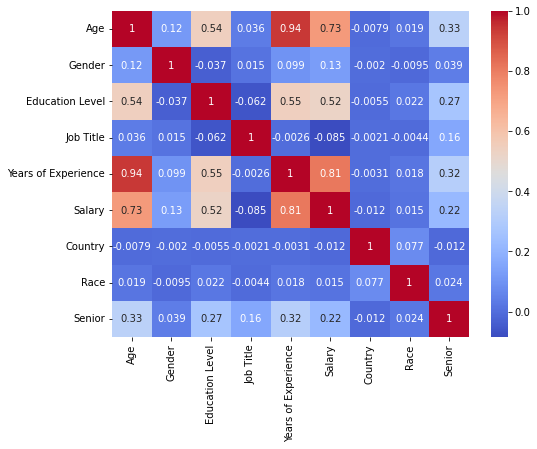

In [42]:
corr_matrix = df1.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")


Age and Salary: There is a moderate positive correlation between age and salary. This suggests that, generally, salary tends to increase with age.
Years of Experience and Salary: There is a strong positive correlation between years of experience and salary, indicating that individuals with more years of experience tend to have higher salaries.
Senior Position and Salary: The correlation between being in a senior position and salary is moderately positive, suggesting that senior positions are typically associated with higher salaries.

Is there a gender pay gap within specific job titles? If so, does it vary based on education level or years of experience? 

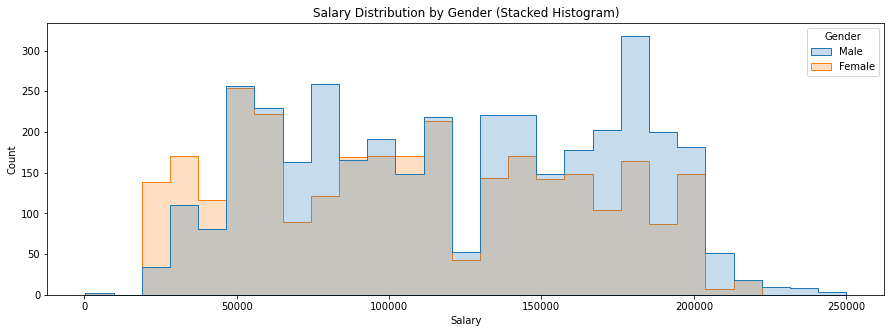

In [44]:
plt.figure(figsize=(15, 5))
sns.histplot(data=df2, x="Salary", hue="Gender",
             element="step", common_norm=False)
plt.title("Salary Distribution by Gender (Stacked Histogram)")
plt.show()

In [46]:
gender_colors = {"Female": "pink", "Male": "blue"}

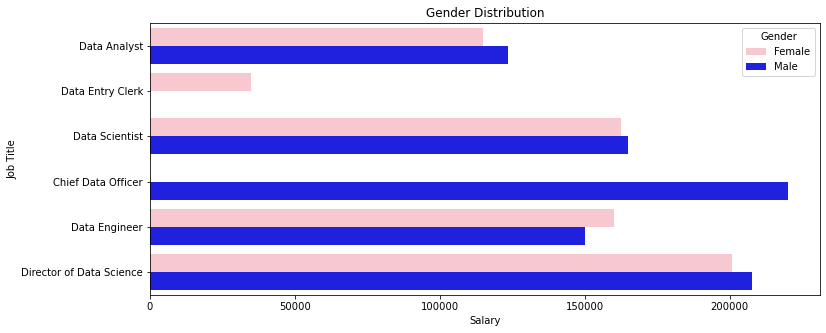

In [47]:
# Data 
data_subset = df2[df2['Job Title'].str.contains('data', case=False, na=False)]
data_subset.head()
plt.figure(figsize=(12, 5))
sns.barplot(data=data_subset, x="Salary", y="Job Title", hue='Gender',palette=gender_colors, ci=None)
plt.title("Gender Distribution")
plt.show()

In [48]:
df2['Education Level']

0       0
1       2
2       3
3       0
4       2
       ..
6695    3
6696    1
6697    0
6698    2
6699    1
Name: Education Level, Length: 6684, dtype: int64

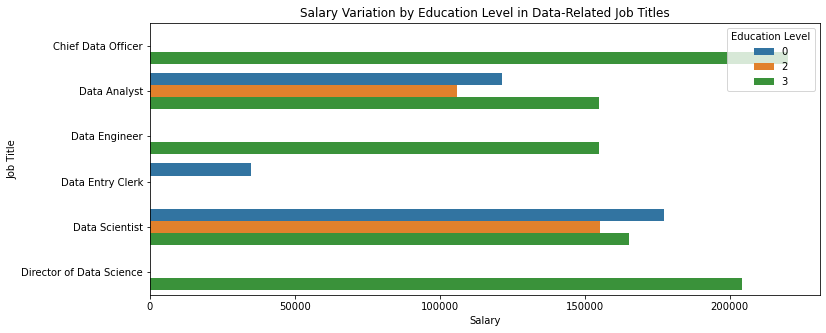

In [49]:
edu_level_salary = data_subset.groupby(['Job Title', 'Gender', 'Education Level'])['Salary'].mean().reset_index()
plt.figure(figsize=(12, 5))
sns.barplot(data=edu_level_salary, x="Salary", y="Job Title", hue='Education Level', ci=None)
plt.title("Salary Variation by Education Level in Data-Related Job Titles")
plt.show()



/var/folders/kr/69yx7dk54w32fmx1yq1fv5r00000gn/T/ipykernel_32453/2853538494.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['Experience Group'] = data_subset['Years of Experience'].apply(group_experience)


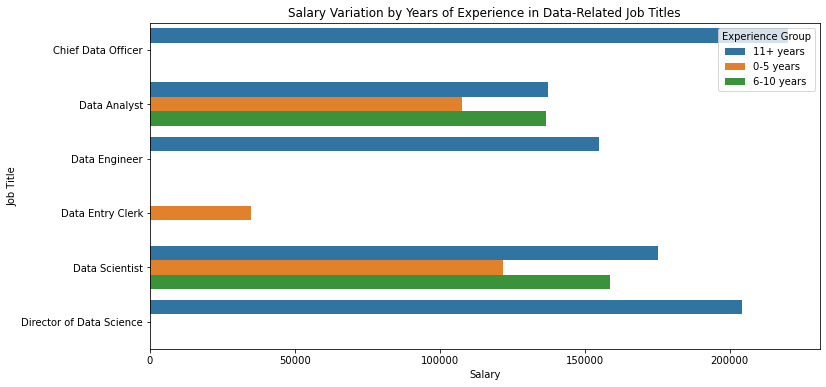

In [50]:
# Years of Experience Analysis
# Grouping years into categories
def group_experience(years):
    if years <= 5:
        return '0-5 years'
    elif years <= 10:
        return '6-10 years'
    else:
        return '11+ years'

data_subset['Experience Group'] = data_subset['Years of Experience'].apply(group_experience)
exp_level_salary = data_subset.groupby(['Job Title', 'Gender', 'Experience Group'])['Salary'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(data=exp_level_salary, x="Salary", y="Job Title", hue='Experience Group', ci=None)
plt.title("Salary Variation by Years of Experience in Data-Related Job Titles")
plt.show()


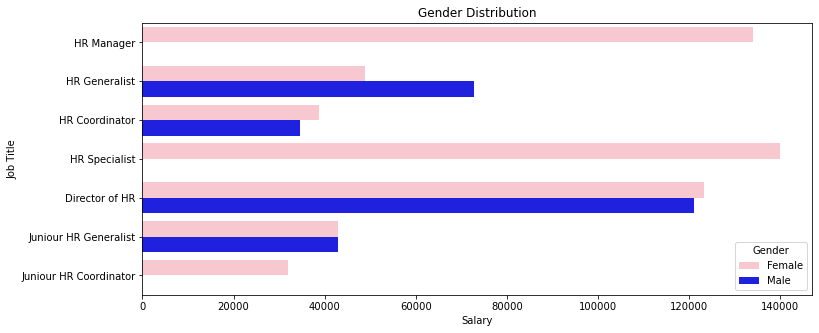

In [51]:
# Web
HR_subset = df2[df2['Job Title'].str.contains('HR', case=False, na=False)]
plt.figure(figsize=(12, 5))
sns.barplot(data=HR_subset, x="Salary", y="Job Title", hue='Gender',palette=gender_colors, ci=None)
plt.title("Gender Distribution")
plt.show()

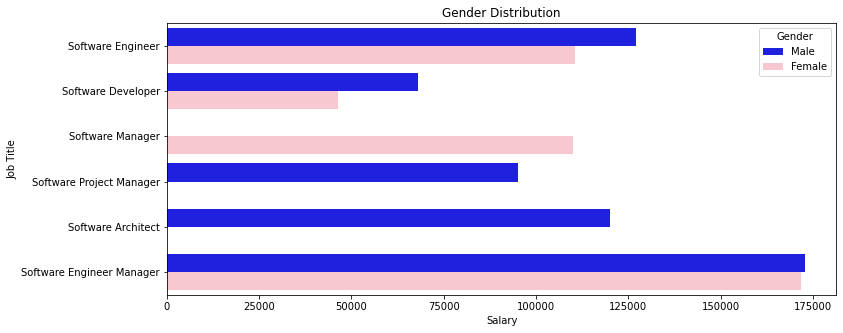

In [52]:
# Software
Software_subset = df2[df2['Job Title'].str.contains('Software', case=False, na=False)]
Software_subset
plt.figure(figsize=(12, 5))
sns.barplot(data=Software_subset, x="Salary", y="Job Title", hue='Gender', palette=gender_colors,ci=None)
plt.title("Gender Distribution")
plt.show()

Are there racial disparities in salaries? If so, in which titles or countries are they most pronounced?

In [95]:
# Grouping data by race and calculating average salary
average_salary_by_race = df2.groupby('Race')['Salary'].mean().sort_values(ascending=True)
average_salary_by_race


Race
Hispanic            110410.139752
Chinese             111248.316027
African American    112355.284091
Welsh               112560.645646
Australian          114236.676991
Asian               115246.048780
Mixed               116330.859281
White               117042.938682
Korean              117099.757112
Black               118415.627586
Name: Salary, dtype: float64

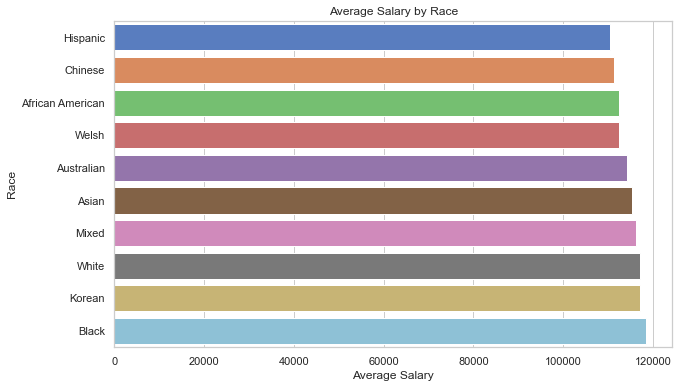

In [97]:
# Plotting the average salary by race
plt.figure(figsize=(10, 6))
sns.barplot(x=average_salary_by_race.values, y=average_salary_by_race.index, palette="muted")
plt.title('Average Salary by Race')
plt.xlabel('Average Salary')
plt.ylabel('Race')
plt.show()

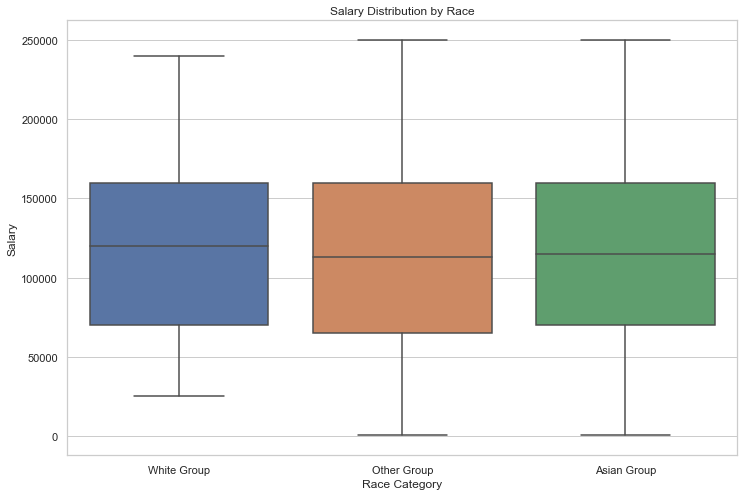

In [164]:
salary_percentiles = df2.groupby('Race Category')['Salary'].describe(percentiles=[.25, .5, .75])
# Plotting the results
plt.figure(figsize=(12, 8))
sns.boxplot(x='Race Category', y='Salary', data=df2)
plt.title('Salary Distribution by Race')
plt.show()

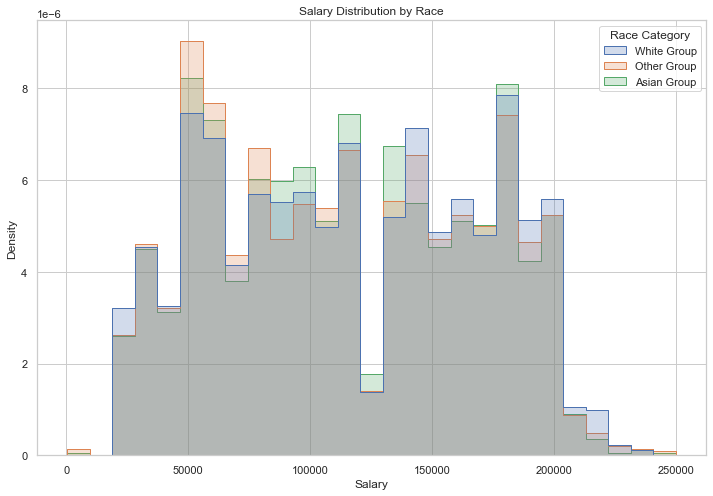

In [165]:
plt.figure(figsize=(12, 8))
sns.histplot(data=df2, x="Salary", hue="Race Category", element="step", stat="density", common_norm=False, kde=False)
plt.title('Salary Distribution by Race')
plt.xlabel('Salary')
plt.ylabel('Density')
plt.show()


In [103]:
from scipy.stats import kruskal

# Extracting salaries for each racial group
groups = df2.groupby('Race')['Salary'].apply(list)

# Performing the Kruskal-Wallis Test
stat, p = kruskal(*groups)

# Printing the results
print(f'Kruskal-Wallis Test Statistic: {stat}, P-value: {p}')


Kruskal-Wallis Test Statistic: 11.352127636159382, P-value: 0.2523423148565049


Are there significant differences in salary based on country? Do certain countries have higher average salaries within specific job categories?

In [61]:
average_salary_by_country = df2.groupby('Country')['Salary'].mean().sort_values(ascending=True)
average_salary_by_country

Country
USA          112998.758112
Australia    114925.465169
UK           115919.916667
China        116282.589993
Canada       116455.090772
Name: Salary, dtype: float64

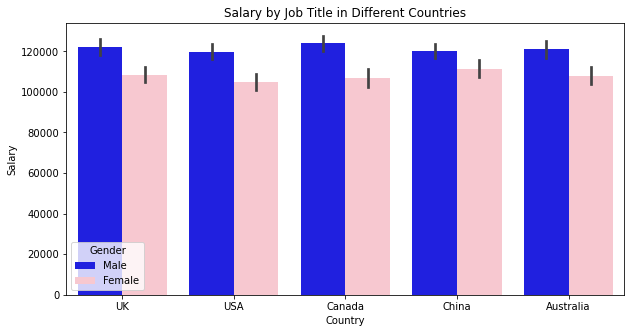

In [64]:
# Calculate the average salary for each country
plt.figure(figsize=(10, 5))
sns.barplot(data=df2, x="Country", y="Salary",hue='Gender',palette= gender_colors)

plt.title("Salary by Job Title in Different Countries")
plt.xlabel("Country")
plt.ylabel("Salary")
plt.show()

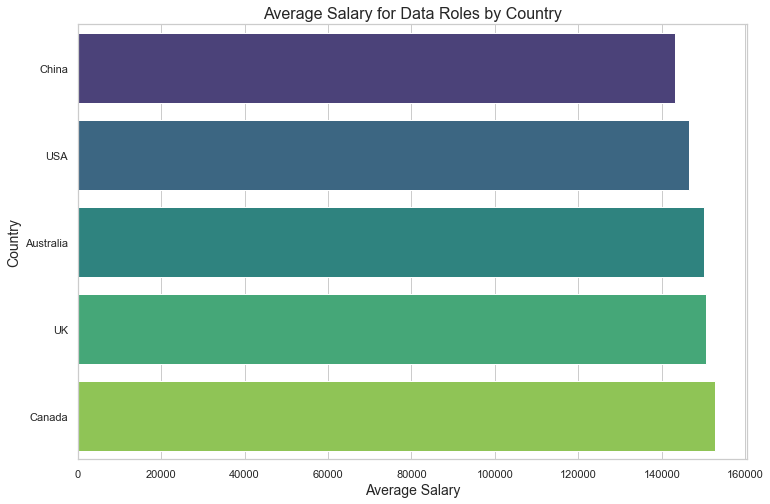

In [87]:
# Filtering for data roles
data_roles = df2[df2['Job Title'].str.contains('data', case=False, na=False)]

# Grouping by country and calculating the average salary for data roles in each country
average_salary_data_roles_by_country = data_roles.groupby('Country')['Salary'].mean()

# Sorting the data for a more organized plot
sorted_salaries = average_salary_data_roles_by_country.sort_values()

# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# Creating the plot
plt.figure(figsize=(12, 8))
barplot = sns.barplot(x=sorted_salaries.values, y=sorted_salaries.index, palette="viridis")

# Adding labels and title for clarity
plt.xlabel('Average Salary', fontsize=14)
plt.ylabel('Country', fontsize=14)
plt.title('Average Salary for Data Roles by Country', fontsize=16)

plt.show()


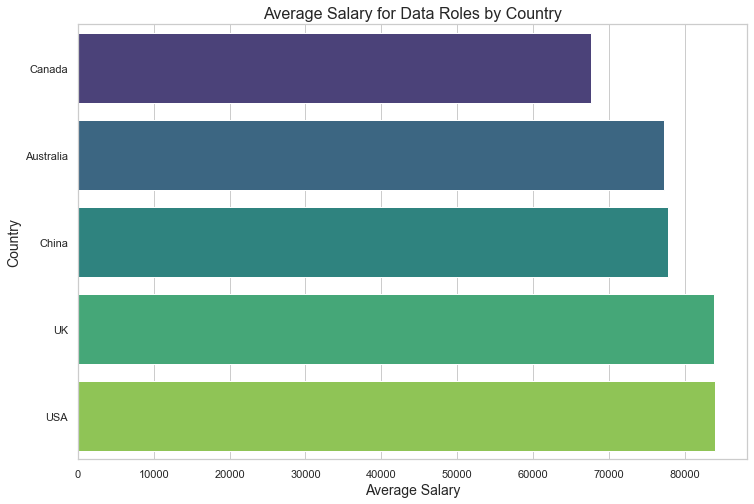

In [88]:
# Filtering for data roles
data_roles = df2[df2['Job Title'].str.contains('HR', case=False, na=False)]

# Grouping by country and calculating the average salary for data roles in each country
average_salary_data_roles_by_country = data_roles.groupby('Country')['Salary'].mean()

# Sorting the data for a more organized plot
sorted_salaries = average_salary_data_roles_by_country.sort_values()

# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# Creating the plot
plt.figure(figsize=(12, 8))
barplot = sns.barplot(x=sorted_salaries.values, y=sorted_salaries.index, palette="viridis")

# Adding labels and title for clarity
plt.xlabel('Average Salary', fontsize=14)
plt.ylabel('Country', fontsize=14)
plt.title('Average Salary for HR Roles by Country', fontsize=16)

plt.show()

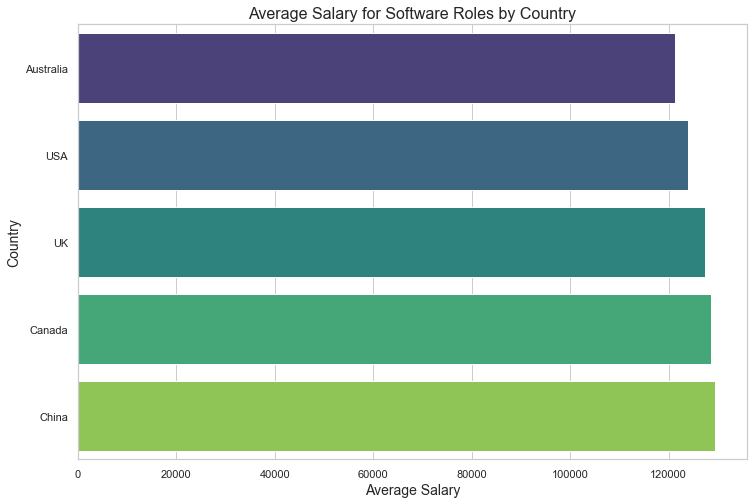

In [104]:
# Filtering for data roles
data_roles = df2[df2['Job Title'].str.contains('Software', case=False, na=False)]

# Grouping by country and calculating the average salary for data roles in each country
average_salary_data_roles_by_country = data_roles.groupby('Country')['Salary'].mean()

# Sorting the data for a more organized plot
sorted_salaries = average_salary_data_roles_by_country.sort_values()

# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# Creating the plot
plt.figure(figsize=(12, 8))
barplot = sns.barplot(x=sorted_salaries.values, y=sorted_salaries.index, palette="viridis")

# Adding labels and title for clarity
plt.xlabel('Average Salary', fontsize=14)
plt.ylabel('Country', fontsize=14)
plt.title('Average Salary for Software Roles by Country', fontsize=16)

plt.show()

In [105]:
df2

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior
0,32,Male,0,Software Engineer,5.0,90000.0,UK,White,0
1,28,Female,2,Data Analyst,3.0,65000.0,USA,Hispanic,0
2,45,Male,3,Manager,15.0,150000.0,Canada,White,1
3,36,Female,0,Sales Associate,7.0,60000.0,USA,Hispanic,0
4,52,Male,2,Director,20.0,200000.0,USA,Asian,0
...,...,...,...,...,...,...,...,...,...
6695,49,Female,3,Director of Marketing,20.0,200000.0,UK,Mixed,0
6696,32,Male,1,Sales Associate,3.0,50000.0,Australia,Australian,0
6697,30,Female,0,Financial Manager,4.0,55000.0,China,Chinese,0
6698,46,Male,2,Marketing Manager,14.0,140000.0,China,Korean,0


In [115]:
# Define the categories
race_categories = {
    'Asian': 'Asian Group',  # Asian, Korean, Chinese categorized as 'Asian Group'
    'Korean': 'Asian Group',
    'Chinese': 'Asian Group',
    'White': 'White Group',  # White categorized as 'White Group'
}

# Default category for others
default_category = 'Other Group'

# Apply categorization
df2['Race Category'] = df2['Race'].apply(lambda x: race_categories.get(x, default_category))

# Finding the country where Asians earn the highest average salary
asian_salaries = df2[df2['Race Category'] == 'Asian Group'].groupby('Country')['Salary'].mean()

highest_salary_country = asian_salaries.idxmax()
highest_average_salary = asian_salaries.max()

highest_salary_country, highest_average_salary


('UK', 118520.49549549549)

<AxesSubplot:xlabel='Country'>

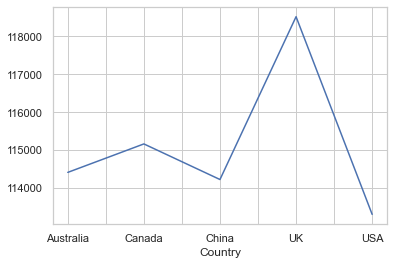

In [154]:
asian_salaries.plot()

In [149]:
# Finding the country where each race category earns the highest average salary
country_race_salary = df2.groupby(['Country','Race Category'])['Salary'].mean().unstack()

country_race_salary

Race Category,Asian Group,Other Group,White Group
Country,,,
Australia,114408.016807,114236.676991,116295.582310
Canada,115159.859341,118415.627586,115845.129630
China,114219.547778,NaN,120512.061503
UK,118520.495495,114448.578711,116267.475904
USA,113298.970149,111426.001484,115763.792507


<AxesSubplot:ylabel='Country'>

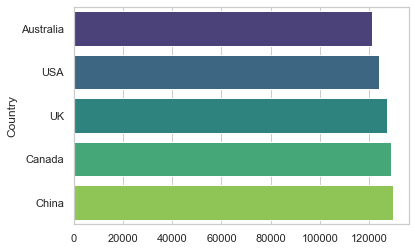

In [152]:
 sns.barplot(x=sorted_salaries.values, y=sorted_salaries.index, palette="viridis")

<Figure size 720x360 with 0 Axes>

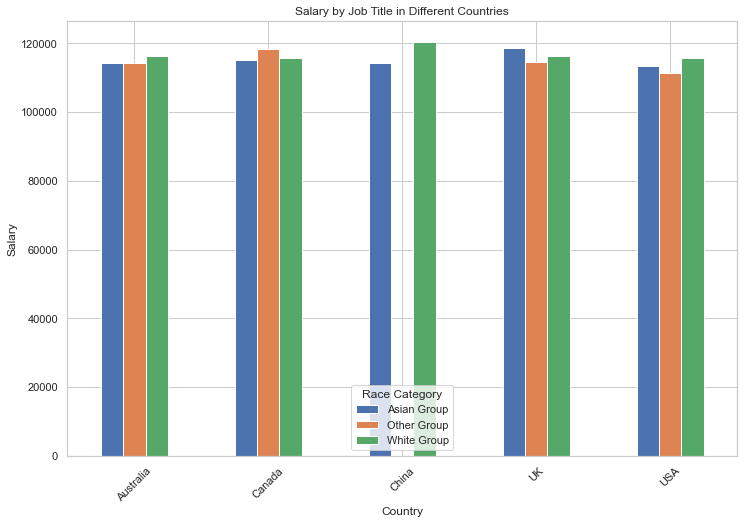

In [151]:
plt.figure(figsize=(10, 5))
country_race_salary.plot(kind='bar', figsize=(12, 8))

plt.title("Salary by Job Title in Different Countries")
plt.xlabel("Country")
plt.ylabel("Salary")
plt.xticks(rotation=45)
plt.show()

In [134]:
data_subset = df2[df2['Job Title'].str.contains('data', case=False, na=False)]
data_subset

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior,Race Category
1,28,Female,2,Data Analyst,3.0,65000.0,USA,Hispanic,0,Other Group
18,25,Female,0,Data Entry Clerk,0.0,35000.0,UK,Asian,0,Asian Group
32,29,Male,2,Data Scientist,3.0,75000.0,USA,Hispanic,0,Other Group
63,47,Male,3,Data Scientist,21.0,180000.0,China,White,1,White Group
81,41,Female,2,Data Analyst,13.0,80000.0,USA,White,0,White Group
...,...,...,...,...,...,...,...,...,...,...
6198,32,Female,3,Data Scientist,9.0,145000.0,China,Korean,0,Asian Group
6212,32,Female,3,Data Scientist,9.0,145000.0,China,White,0,White Group
6226,32,Female,3,Data Scientist,9.0,145000.0,UK,Asian,0,Asian Group
6240,32,Female,3,Data Scientist,9.0,145000.0,USA,Asian,0,Asian Group


In [135]:
# Filtering the subset for only China and USA
data_subset_china_usa = data_subset[data_subset['Country'].isin(['China', 'USA'])]

# Calculating the average salary for each country in the subset
average_salary_china_usa = data_subset_china_usa.groupby('Country')['Salary'].mean()

# Determining which country has the higher average salary
average_salary_china_usa


Country
China    143057.142857
USA      146435.233161
Name: Salary, dtype: float64

In [173]:
df2

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior,Race Category
0,32,Male,0,Software Engineer,5.0,90000.0,UK,White,0,White Group
1,28,Female,2,Data Analyst,3.0,65000.0,USA,Hispanic,0,Other Group
2,45,Male,3,Manager,15.0,150000.0,Canada,White,1,White Group
3,36,Female,0,Sales Associate,7.0,60000.0,USA,Hispanic,0,Other Group
4,52,Male,2,Director,20.0,200000.0,USA,Asian,0,Asian Group
...,...,...,...,...,...,...,...,...,...,...
6695,49,Female,3,Director of Marketing,20.0,200000.0,UK,Mixed,0,Other Group
6696,32,Male,1,Sales Associate,3.0,50000.0,Australia,Australian,0,Other Group
6697,30,Female,0,Financial Manager,4.0,55000.0,China,Chinese,0,Asian Group
6698,46,Male,2,Marketing Manager,14.0,140000.0,China,Korean,0,Asian Group


In [191]:
# Preparing the data
X_new = df2.drop(['Salary','Race'], axis=1)
y_new = df2['Salary']

# Encoding categorical variables
categorical_features_new = ['Gender', 'Education Level', 'Job Title', 'Country', 'Race','Race Category','Senior']
one_hot_new = OneHotEncoder()
transformer_new = ColumnTransformer([('one_hot', one_hot_new, categorical_features_new)], remainder='passthrough')

# Splitting the data into train and test sets
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size=0.2, random_state=42)

# Creating and training the Random Forest model
rf_model_new = Pipeline([
    ('transformer', transformer_new),
    ('model', RandomForestRegressor(n_estimators=100, random_state=42))
])
rf_model_new.fit(X_train_new, y_train_new)

# Extracting feature importances
feature_importances = rf_model_new.named_steps['model'].feature_importances_


def get_feature_names(column_transformer):
    """
    Get feature names from all transformers in a ColumnTransformer.
    """
    feature_names = []

    # Loop over all transformers in the ColumnTransformer
    for transformer_in_columns in column_transformer.transformers_[:-1]: # Last transformer is 'remainder'
        transformer = transformer_in_columns[1]
        cols = transformer_in_columns[2]

        if isinstance(transformer, Pipeline):
            # If a transformer is a pipeline, take the last step of the pipeline
            transformer = transformer.steps[-1][1]

        if isinstance(transformer, OneHotEncoder):
            # If the transformer is a OneHotEncoder, get feature names
            for col in cols:
                feature_names.extend([f"{col}_{category}" for category in transformer.categories_[0]])
        else:
            # Otherwise, just append the column name
            feature_names.extend(cols)

    return feature_names

# Applying the function to get feature names
feature_names_manual = get_feature_names(transformer_new)
feature_importance_dict_manual = dict(zip(feature_names_manual, feature_importances))

# Sorting the features by their importance
sorted_feature_importance_manual = sorted(feature_importance_dict_manual.items(), key=lambda item: item[1], reverse=True)

sorted_feature_importance_manual





ValueError: A given column is not a column of the dataframe

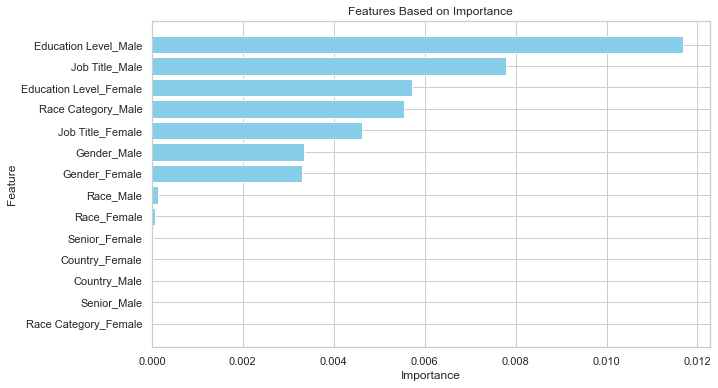

In [190]:
# Converting the sorted feature importance to a DataFrame for easier plotting
feature_importance_df = pd.DataFrame(sorted_feature_importance_manual, columns=['Feature', 'Importance'])

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Features Based on Importance')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature on top
plt.show()


/var/folders/kr/69yx7dk54w32fmx1yq1fv5r00000gn/T/ipykernel_32453/3311043774.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['Gender_Senior'] = data_subset['Gender'] + ' - ' + data_subset['Senior'].map({0: 'Non-Senior', 1: 'Senior'})


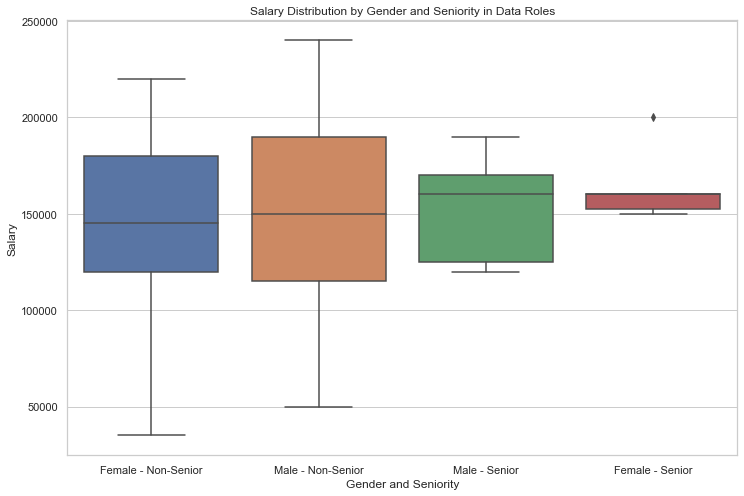

In [188]:
# Grouping by 'Gender' and 'Senior' and calculating average salary
salary_grouped = data_subset.groupby(['Gender', 'Senior'])['Salary'].mean().reset_index()

salary_grouped

data_subset['Gender_Senior'] = data_subset['Gender'] + ' - ' + data_subset['Senior'].map({0: 'Non-Senior', 1: 'Senior'})
# Re-plotting the boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(x='Gender_Senior', y='Salary', data=data_subset)
plt.title('Salary Distribution by Gender and Seniority in Data Roles')
plt.xlabel('Gender and Seniority')
plt.ylabel('Salary')
plt.show()


